In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

**Goal:** Classify images belonging to two categories.

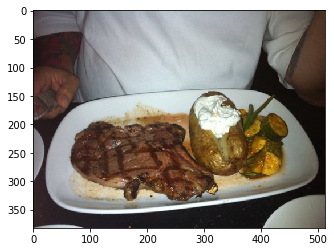

In [5]:
img = plt.imread('./data/hotdog/train/not_hot_dog/100135.jpg')
plt.imshow(img);

# How to solve this?

- Flatten everything so that we end up with a matrix (in principle, of size `(n_pictures, height*width*3)`).
- Apply your favorite classifier.

This is 'classical computer vision' approach. Features are created (using e.g. `scikit-image` or `opencv`).

We will:
- keep everything (no feature reduction).
- Use Python generators (implicitly on `keras`) to avoid creating a huge matrix.

**1. Define our deep learning architecture**

In [7]:
from keras import Sequential

In [8]:
from keras.layers import Flatten, Dense

In [10]:
model = Sequential([
    Flatten(input_shape=(100,100,3)), # First layer should specify the input_shape
    Dense(128, activation='relu'), # 128 neurons, ReLU activation function
    Dense(10, activation='relu'),
    Dense(1, activation='sigmoid') # sigmoid goes here because we want to predict class probabilities
]);

In [15]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 30000)             0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               3840128   
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1290      
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 11        
Total params: 3,841,429
Trainable params: 3,841,429
Non-trainable params: 0
_________________________________________________________________


In [17]:
model.compile(optimizer='adam' # ADAM is a popular choice, it's a modified version of gradient descent
              , loss='binary_crossentropy' # loss function for classification
              , metrics = ['accuracy'] # metric for choosing model (in classification)
             );

**2. Pass the data to the estimator using generators**

In [18]:
from keras.preprocessing.image import ImageDataGenerator

In [19]:
train_datagen = ImageDataGenerator(
    rescale = 1./255, 
    horizontal_flip=True, 
    zoom_range=0.2
)

test_datagen = ImageDataGenerator(
    rescale = 1./255, 
    horizontal_flip=True, 
    zoom_range=0.2
)

In [20]:
train_generator = train_datagen.flow_from_directory(
    './data/hotdog/train/',
    target_size=(100,100),
    batch_size=32,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
    './data/hotdog/train/',
    target_size=(100,100),
    batch_size=32,
    class_mode='binary'
)

Found 498 images belonging to 2 classes.
Found 498 images belonging to 2 classes.


**3. Train the model**

In [24]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch= train_generator.n//train_generator.batch_size, # 498 images // 32 (batch size)
    validation_data = test_generator,
    validation_steps = 1, 
    epochs = 10, # Number of times the training data will be revisited
    verbose=False
)

Epoch 1/10
15/15 [==============================] - 5s 341ms/step - loss: 2.9885 - acc: 0.5313 - val_loss: 1.0554 - val_acc: 0.6250
Epoch 2/10
15/15 [==============================] - 5s 353ms/step - loss: 1.3980 - acc: 0.5199 - val_loss: 1.1977 - val_acc: 0.5625
Epoch 3/10
15/15 [==============================] - 5s 359ms/step - loss: 1.0813 - acc: 0.5793 - val_loss: 1.2248 - val_acc: 0.6111
Epoch 4/10
15/15 [==============================] - 5s 346ms/step - loss: 0.9734 - acc: 0.5681 - val_loss: 1.2201 - val_acc: 0.5312
Epoch 5/10
15/15 [==============================] - 5s 343ms/step - loss: 0.8938 - acc: 0.5787 - val_loss: 0.7221 - val_acc: 0.5312
Epoch 6/10
15/15 [==============================] - 5s 357ms/step - loss: 0.7270 - acc: 0.6226 - val_loss: 0.4955 - val_acc: 0.7812
Epoch 7/10
15/15 [==============================] - 6s 372ms/step - loss: 0.9872 - acc: 0.5727 - val_loss: 1.5190 - val_acc: 0.5000
Epoch 8/10
15/15 [==============================] - 6s 394ms/step - loss: 1.

In [25]:
history.history.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

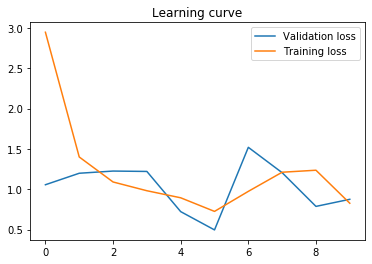

In [26]:
plt.plot(history.history['val_loss'], label='Validation loss')
plt.plot(history.history['loss'], label='Training loss')
plt.title('Learning curve')
plt.legend(loc='best')

In [28]:
model.save_weights('simple_network.h5')

In [34]:
model.to_json()

'{"class_name": "Sequential", "config": {"name": "sequential_2", "layers": [{"class_name": "Flatten", "config": {"name": "flatten_2", "trainable": true, "batch_input_shape": [null, 100, 100, 3], "dtype": "float32", "data_format": "channels_last"}}, {"class_name": "Dense", "config": {"name": "dense_4", "trainable": true, "units": 128, "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "VarianceScaling", "config": {"scale": 1.0, "mode": "fan_avg", "distribution": "uniform", "seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias_regularizer": null, "activity_regularizer": null, "kernel_constraint": null, "bias_constraint": null}}, {"class_name": "Dense", "config": {"name": "dense_5", "trainable": true, "units": 10, "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "VarianceScaling", "config": {"scale": 1.0, "mode": "fan_avg", "distribution": "uniform", "seed": null}}, "bias_initializ

**Loading back the model**

In [29]:
new_model = Sequential([
    Flatten(input_shape=(100,100,3)), # First layer should specify the input_shape
    Dense(128, activation='relu'), # 128 neurons, ReLU activation function
    Dense(10, activation='relu'),
    Dense(1, activation='sigmoid') # sigmoid goes here because we want to predict class probabilities
]);

In [36]:
from keras.models import model_from_json
new_model_ = model_from_json(model.to_json())

In [ ]:
new_model.load_weights('simple_network.h5')

In [37]:
new_model_.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 30000)             0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               3840128   
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1290      
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 11        
Total params: 3,841,429
Trainable params: 3,841,429
Non-trainable params: 0
_________________________________________________________________
